In [1]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
# parameters
N  = 50
h0 = -np.pi/2

In [4]:
# create the dataset
X = stats.laplace_asymmetric.rvs(2,size=N)
dataMean = np.mean(X)

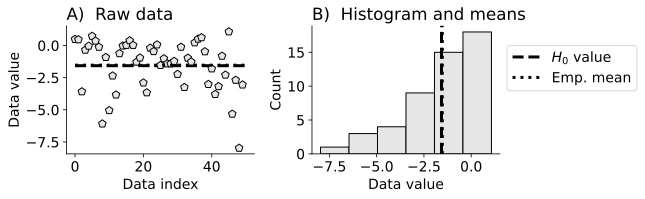

In [5]:
# plot
_,axs = plt.subplots(1,2,figsize=(9,3))

axs[0].plot(X,'kp',markersize=8,markerfacecolor=(.9,.9,.9),label='Data')
axs[0].plot([0,N],[h0,h0],'k--',zorder=-10,linewidth=3,label=r'$H_0$ value')
axs[0].plot([0,N],[dataMean,dataMean],'k:',linewidth=3,label='Emp. mean')
axs[0].set(xlabel='Data index',ylabel='Data value')
axs[0].set_title(r'A)  Raw data')

axs[1].hist(X,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1].axvline(h0,linestyle='--',color='k',linewidth=3,label=r'$H_0$ value')
axs[1].axvline(dataMean,linestyle=':',color='k',linewidth=3,label=r'Emp. mean')
axs[1].set(xlabel='Data value',ylabel='Count')
axs[1].set_title(r'B)  Histogram and means')
axs[1].legend(bbox_to_anchor=[1,.9])

# display the figure
plt.tight_layout()
plt.show()

In [6]:
# t-tests

# manual calculation
t_num = dataMean - h0
t_den = np.std(X,ddof=1) / np.sqrt(N)

tval  = t_num / t_den
pval  = 1-stats.t.cdf( np.abs(tval) ,N-1)
pval *= 2 # double it for 2-tailed test    


In [7]:
# using scipy.stats
r  = stats.ttest_1samp(X,h0)
t  = r.statistic
df = r.df
p  = r.pvalue

In [8]:
# print both results
print(f'Manual ttest: t({N-1})={tval:.3f}, p={pval:.3f}')
print(f'Scipy  ttest: t({df})={t:.3f}, p={p:.3f}')
 

Manual ttest: t(49)=0.153, p=0.879
Scipy  ttest: t(49)=0.153, p=0.879


# Exe 2

In [9]:
# how often do we get subthreshold results?

nExps = 500
issig = np.zeros(nExps,dtype=bool) 
means = np.zeros(nExps)
stds  = np.zeros(nExps)

In [10]:
# run the experiment
for i in range(nExps):

  # generate data and store the mean/std
  X = stats.laplace_asymmetric.rvs(2,size=N)
  means[i] = np.mean(X)
  stds[i]  = np.std(X,ddof=1)

  # run the ttest and store if "significant"
  r = stats.ttest_1samp(X,h0)
  issig[i] = r.pvalue<.05


In [11]:
# print the results
print(f'p<.05 in {np.sum(issig)}/{nExps} times.')

p<.05 in 47/500 times.


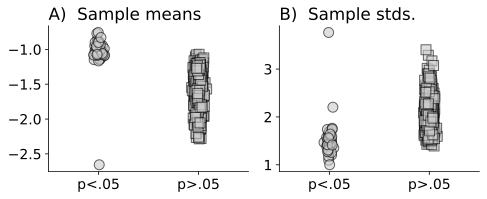

In [12]:
# plot
_,axs = plt.subplots(1,2,figsize=(7,3))

# means
axs[0].plot(np.random.randn(sum(issig))/40,means[issig],
            'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].plot(np.random.randn(sum(~issig))/40+1,means[~issig],
            'ks',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[0].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['p<.05','p>.05'],
           title=r'A)  Sample means')

# stds
axs[1].plot(np.random.randn(sum(issig))/40,stds[issig],
            'ko',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[1].plot(np.random.randn(sum(~issig))/40+1,stds[~issig],
            'ks',markersize=10,markerfacecolor=(.8,.8,.8),alpha=.6)
axs[1].set(xlim=[-.5,1.5],xticks=[0,1],xticklabels=['p<.05','p>.05'],
           title=r'B)  Sample stds.')

# display the figure
plt.tight_layout()
plt.show()

# Exe 3

In [13]:
NperSample = 40
MDatasets = 25

In [14]:
# data
X = np.random.normal(loc=1,scale=1,size=(NperSample,MDatasets))

In [15]:
# confirm data size
print('Data size should be sample-size X datasets:')
print(X.shape)
     

Data size should be sample-size X datasets:
(40, 25)


In [16]:
# ttest with matrix input
ttest_matrix = stats.ttest_1samp(X,0)

In [17]:
# ttest in for-loop over each column (each dataset)
ttest_4loop = np.zeros(MDatasets)
for i in range(MDatasets):
  ttest_4loop[i] = stats.ttest_1samp(X[:,i],0).statistic
     


In [18]:
# print the results
print('Matrix  |  Vector')
print('--------|--------')
for i in range(MDatasets):
  print(f'{ttest_matrix.statistic[i]:.4f}  |  {ttest_4loop[i]:.4f}')


Matrix  |  Vector
--------|--------
4.7475  |  4.7475
5.1833  |  5.1833
6.0737  |  6.0737
7.3492  |  7.3492
7.2337  |  7.2337
7.3554  |  7.3554
5.6638  |  5.6638
6.9851  |  6.9851
5.4258  |  5.4258
6.7619  |  6.7619
5.9297  |  5.9297
5.5855  |  5.5855
10.9136  |  10.9136
4.1128  |  4.1128
5.8460  |  5.8460
6.7042  |  6.7042
5.6318  |  5.6318
5.7388  |  5.7388
5.3634  |  5.3634
4.7564  |  4.7564
7.0106  |  7.0106
7.3012  |  7.3012
6.0903  |  6.0903
4.2412  |  4.2412
7.5830  |  7.5830


# Exe 4

In [19]:
# data parameters
N = 40
k = 300


In [20]:
# list of standard deviations
stds = np.linspace(.1,3,k)

In [21]:
# initialize the t/p vectors
t = np.zeros(k)
p = np.zeros(k)
s = np.zeros(k) 

In [22]:
for i in range(len(stds)):
  X = np.random.normal(0,stds[i],size=N)
  X = X-np.mean(X) + .5 # force mean=.5
  ttest = stats.ttest_1samp(X,0)
  t[i]  = ttest.statistic
  p[i]  = ttest.pvalue

  # get the sample std 
  s[i] = np.std(X,ddof=1)

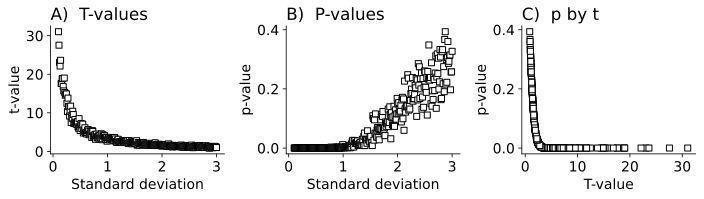

In [23]:
# plot
_,axs = plt.subplots(1,3,figsize=(10,3))

# t's
axs[0].plot(stds,t,'ks',markerfacecolor='w')
axs[0].set(xlabel='Standard deviation',ylabel='t-value',title=r'A)  T-values')

# p's
axs[1].plot(stds,p,'ks',markerfacecolor='w')
axs[1].set(xlabel='Standard deviation',ylabel='p-value',title=r'B)  P-values')

# t and p
axs[2].plot(t,p,'ks',markerfacecolor='w')
axs[2].set(xlabel='T-value',ylabel='p-value',title=r'C)  p by t')

# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [24]:
# correlation coefficient 
r = np.corrcoef(stds,s)
r

array([[1.        , 0.97187372],
       [0.97187372, 1.        ]])

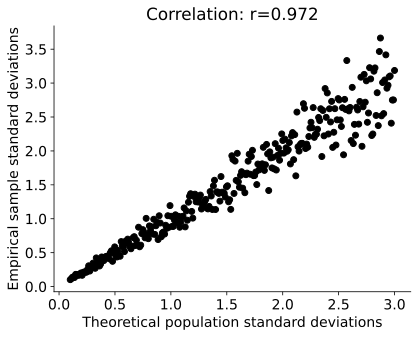

In [25]:
# plot
plt.plot(stds,s,'ko')
plt.xlabel('Theoretical population standard deviations')
plt.ylabel('Empirical sample standard deviations')
plt.title(f'Correlation: r={r[0,1]:.3f}',loc='center')

plt.show()

# Exe 6

In [26]:
nExperiments = 250
meanoffsets = np.linspace(0,.3,51)
samplesizes = np.arange(10,811,step=50)

In [27]:
# initialize
propSig = np.zeros((len(samplesizes),len(meanoffsets)))

In [28]:
# loop over sample sizes
for sidx,ssize in enumerate(samplesizes):

  # loop over effect sizes
  for eidx,effect in enumerate(meanoffsets):

    # generate the data
    X = np.random.normal(loc=effect,scale=1.5,size=(ssize,nExperiments))

    # run the t-test and store the results
    T = stats.ttest_1samp(X,0)
    propSig[sidx,eidx] = 100*np.mean( T.pvalue<.05 )

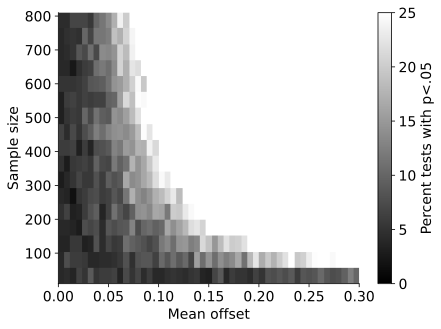

In [29]:
# visualize in a matrix
plt.imshow(propSig,extent=[meanoffsets[0],meanoffsets[-1],samplesizes[0],samplesizes[-1]],
           vmin=0,vmax=25,origin='lower',aspect='auto',cmap='gray')
plt.xlabel('Mean offset')
plt.ylabel('Sample size')
cbar = plt.colorbar()
cbar.set_label('Percent tests with p<.05')

# display the figure
plt.tight_layout()
plt.show()

# Exe 7

In [30]:
Xn = np.array([ 60, 52, 90, 20, 33, 95, 18, 47, 78, 65 ])
Xq = np.array([ 65, 60, 84, 23, 37, 95, 17, 53, 88, 66 ])
sampsize = len(Xn)

In [31]:
# simple subtraction 
Ysub = Xq-Xn

# zscore subtraction 
Ysbz = stats.zscore(Xq) - stats.zscore(Xn)

# percent change 
Ypct = 100*(Xq-Xn) / Xn

# normalized ratio 
Ynrt = (Xq-Xn) / (Xq+Xn)

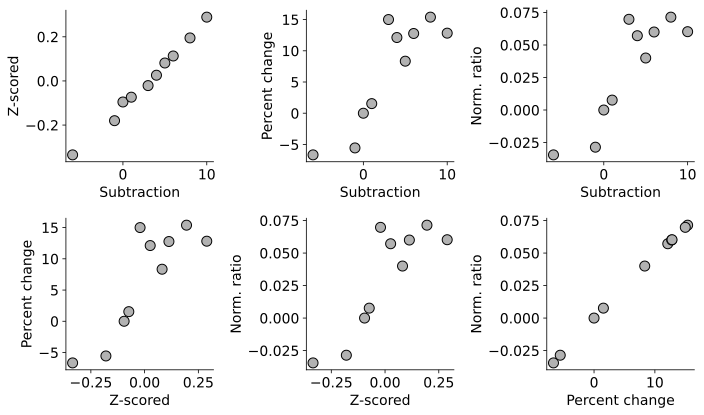

In [32]:
# plot
_,axs = plt.subplots(2,3,figsize=(10,6))
axs[0,0].plot(Ysub,Ysbz,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0,0].set(xlabel='Subtraction',ylabel='Z-scored')

axs[0,1].plot(Ysub,Ypct,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0,1].set(xlabel='Subtraction',ylabel='Percent change')

axs[0,2].plot(Ysub,Ynrt,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0,2].set(xlabel='Subtraction',ylabel='Norm. ratio')

axs[1,0].plot(Ysbz,Ypct,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[1,0].set(xlabel='Z-scored',ylabel='Percent change')

axs[1,1].plot(Ysbz,Ynrt,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[1,1].set(xlabel='Z-scored',ylabel='Norm. ratio')

axs[1,2].plot(Ypct,Ynrt,'ko',markersize=10,markerfacecolor=(.7,.7,.7))
axs[1,2].set(xlabel='Percent change',ylabel='Norm. ratio')

# display the figure
plt.tight_layout()
plt.show()
     


In [33]:
# t-tests
tSub = stats.ttest_1samp(Ysub,0)
tPct = stats.ttest_1samp(Ypct,0)
tsbz = stats.ttest_1samp(Ysbz,0)
tnrt = stats.ttest_1samp(Ynrt,0)

# print the results
print(f'Subtraction (Y1): t({tSub.df})={tSub.statistic:.3f}, p<{tSub.pvalue:.3f}')
print(f'Percent chg (Y2): t({tPct.df})={tPct.statistic:.3f}, p<{tPct.pvalue:.3f}')
print(f'Z subtract  (Y3): t({tsbz.df})={tsbz.statistic:.3f}, p<{tsbz.pvalue:.3f}')
print(f'Norm. ratio (Y4): t({tnrt.df})={tnrt.statistic:.3f}, p<{tnrt.pvalue:.3f}')

Subtraction (Y1): t(9)=2.023, p<0.074
Percent chg (Y2): t(9)=2.445, p<0.037
Z subtract  (Y3): t(9)=0.000, p<1.000
Norm. ratio (Y4): t(9)=2.353, p<0.043


# Exe 8

In [34]:
# parameters
mu1 = 1.2 # population mean in dataset 1
mu2 = 1   # population mean in dataset 2

In [35]:
# sample sizes
ns = np.arange(10,201,step=10)


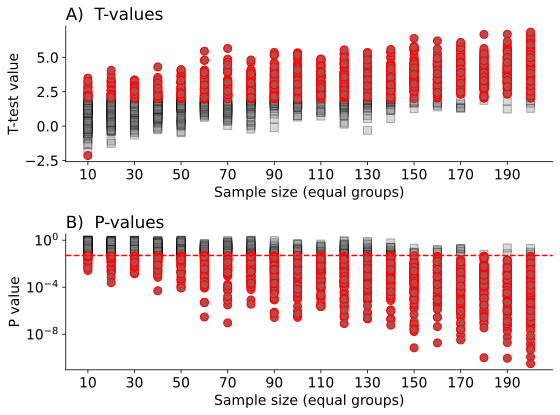

In [36]:
# setup the figure
_,axs = plt.subplots(2,1,figsize=(8,6))

# start the experiment
for ni,N in enumerate(ns):

  # generate the data (100 datasets at a time)
  data1 = np.random.normal(loc=mu1,scale=.5,size=(N,100))
  data2 = np.random.normal(loc=mu2,scale=.5,size=(N,100))

  # run the ttest
  ttest = stats.ttest_ind(data1,data2)
  t = ttest.statistic;
  p = ttest.pvalue;

  # plot the t-value, colored by significance
  axs[0].plot(np.full(np.sum(p>.05),N),t[p>.05],'ks',markersize=8,markerfacecolor=(.5,.5,.5),alpha=.3)
  axs[0].plot(np.full(np.sum(p<.05),N),t[p<.05],'ro',markersize=8,markerfacecolor=(.7,.3,.3))

  # plot the p-values
  axs[1].plot(np.full(np.sum(p>.05),N),p[p>.05],'ks',markersize=8,markerfacecolor=(.5,.5,.5),alpha=.3)
  axs[1].plot(np.full(np.sum(p<.05),N),p[p<.05],'ro',markersize=8,markerfacecolor=(.7,.3,.3))



## rest of the visualization
axs[0].set(xlabel='Sample size (equal groups)',xticks=ns[::2],ylabel='T-test value')
axs[0].set_title(r'A)  T-values')

# adjust the p-values panel
axs[1].set(xlabel='Sample size (equal groups)',xticks=ns[::2],ylabel='P value')
axs[1].set_yscale('log')
axs[1].axhline(.05,linestyle='--',color='r')
axs[1].set_title(r'B)  P-values')

# display the figure
plt.tight_layout()
plt.show()

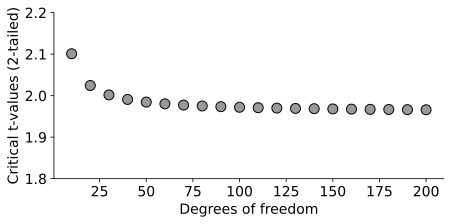

In [38]:
# compute critical t-values for the degrees of freedom
tCrit = stats.t.isf(.05/2,2*ns-2)

# plot
plt.figure(figsize=(7,3))
plt.plot(ns,tCrit,'ko',markersize=10,markerfacecolor=(.6,.6,.6))
plt.ylim([1.8,2.2])
plt.xlabel('Degrees of freedom')
plt.ylabel('Critical t-values (2-tailed)')
plt.show()

# Exe 9

In [39]:
# range of standard deviations
stdevs = np.linspace(.01,15,41)

In [40]:
# initialize results matrix
results = np.zeros((3,len(stdevs)))
tCrit = np.zeros(len(stdevs))

In [41]:
# the experiment
for si,std in enumerate(stdevs):

  # create two groups of data
  X1 = np.random.normal(loc=1,scale=1,size=50)
  X2 = np.random.normal(loc=1.1,scale=std,size=40)

  # levene's test
  results[0,si] = np.log( stats.levene(X1,X2).pvalue )

  # difference of t-values
  same_var = stats.ttest_ind(X1,X2,equal_var=True)  # equal variance
  diff_var = stats.ttest_ind(X1,X2,equal_var=False) # unequal variance
  results[1,si] = same_var.statistic # equal variance
  results[2,si] = diff_var.statistic # unequal variance


  # compute df for tCrit
  s1,s2 = np.var(X1,ddof=1),np.var(X2,ddof=1)
  n1,n2 = len(X1),len(X2)
  df_num = (s1/n1 + s2/n2)**2
  df_den = s1**2/(n1**2*(n1-1)) + s2**2/(n2**2*(n2-1))

  tCrit[si] = stats.t.isf(.05/2,df_num/df_den)


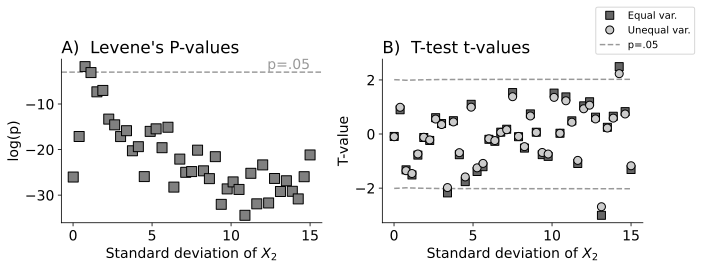

In [42]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

# levene's test results
axs[0].plot(stdevs,results[0,:],'ks',markersize=10,markerfacecolor='gray')
axs[0].axhline(np.log(.05),color=(.6,.6,.6),linestyle='--',zorder=-1)
axs[0].text(np.max(stdevs),np.log(.1),'p=.05',ha='right',color=(.6,.6,.6))
axs[0].set(xlabel=r'Standard deviation of $X_2$',ylabel='log(p)',title=r"A)  Levene's P-values")

# t-tests
axs[1].plot(stdevs,results[1,:],'ks',markersize=8,markerfacecolor=(.4,.4,.4),label='Equal var.')
axs[1].plot(stdevs,results[2,:],'ko',markersize=8,markerfacecolor=(.8,.8,.8),label='Unequal var.')
axs[1].plot(stdevs,tCrit,'--',color=(.6,.6,.6),zorder=-1,label='p=.05')
axs[1].plot(stdevs,-tCrit,'--',color=(.6,.6,.6),zorder=-1)
axs[1].set(xlabel=r'Standard deviation of $X_2$',ylabel='T-value',title=r"B)  T-test t-values")
axs[1].legend(fontsize=10,bbox_to_anchor=[.8,1])

# display the figure
plt.tight_layout()
plt.show()